<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### For all visualizations, please include a title in each graph and appropriate labels.Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

Boxplot for Median value of owner -occupied homes

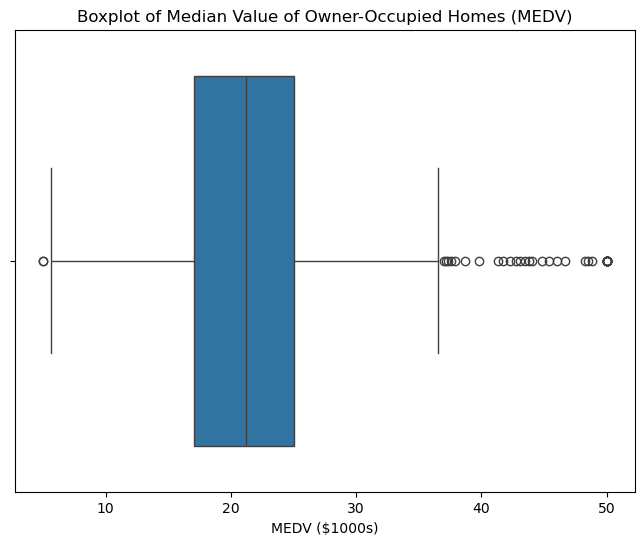

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.show()


Bar Plot of Charles River Variable (CHAS)

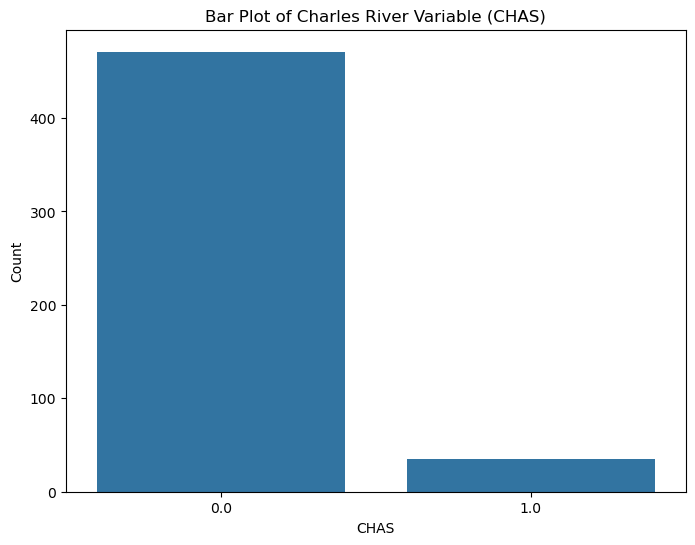

In [13]:

plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()


boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

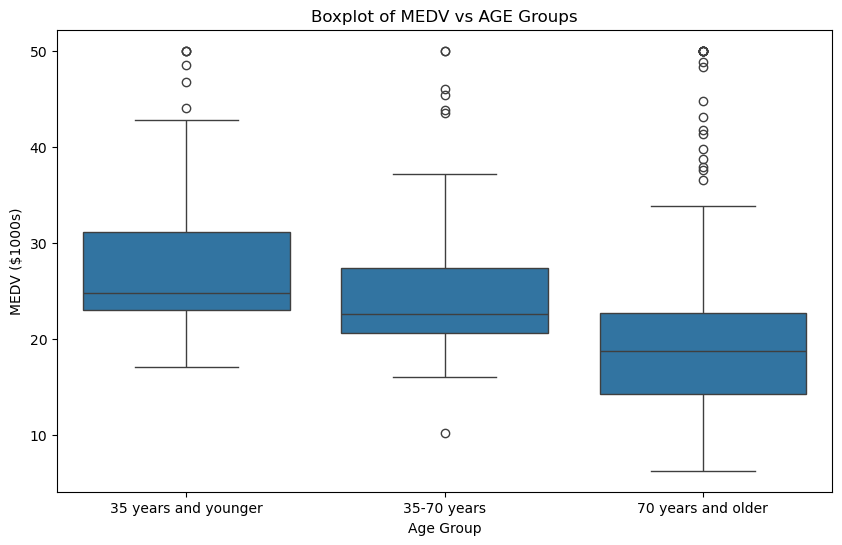

In [17]:
# Discretize AGE into three groups
bins = [0, 35, 70, boston_df ['AGE'].max()]
labels = ['35 years and younger', '35-70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()


The boxplot  shows  the median value of homes varies with different age groups, 
- **Insight** - age of the homes affects their median values

scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 


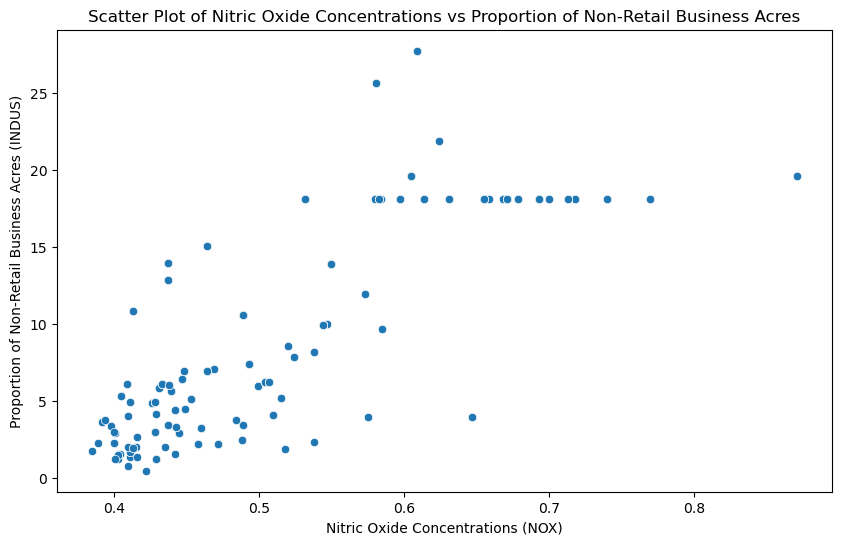

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


**Insight** 
-there is a correlation between the nitric oxide concentration and the proportion of non-retail business acres. A positive or negative trend can indicate how these variables relate to each other.

Histogram for the Pupil-Teacher Ratio (PTRATIO)ow()


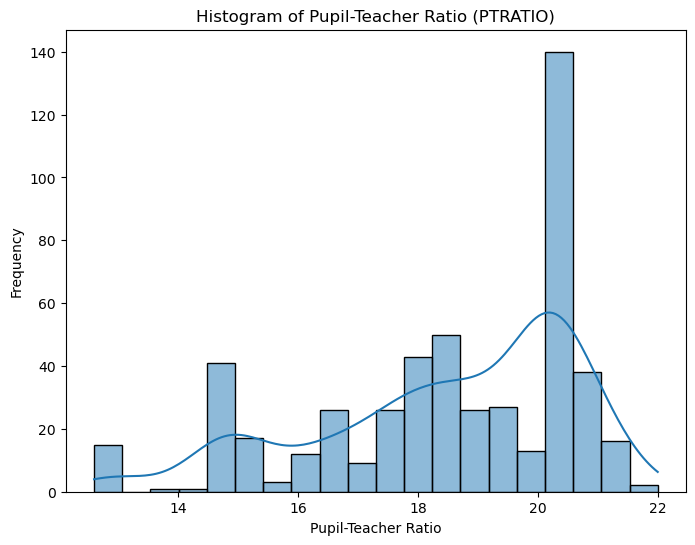

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


### TASK -3


 Use the appropriate tests to answer the questions provided.For each of the following questions;

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

State the hypothesis:
* $H_0:$  There is no difference in median house values between areas bounded by the Charles River and those not bounded.
* $H_1:$ There is a significant difference in median house values between areas bounded by the Charles River and those not bounded.



In [25]:
from scipy.stats import ttest_ind

# Split the data based on CHAS variable
bound_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bound_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_value = ttest_ind(bound_by_river, not_bound_by_river)

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median house values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median house values.")



T-statistic: 4.00
P-value: 0.0001
Reject the null hypothesis: There is a significant difference in median house values.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

State the hypothesis:
* $H_0:$  There is a significant difference in median house values across age groups.
* $H_1:$  No significant difference in median house values across age groups.")


In [30]:
from scipy.stats import f_oneway
import pandas as pd

# Discretize AGE into three groups
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', '35-70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Perform ANOVA
grouped_data = [boston_df[boston_df['AGE_GROUP'] == label]['MEDV'] for label in labels]
f_stat, p_value = f_oneway(*grouped_data)

# Print the results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median house values across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median house values across age groups.")


F-statistic: 30.57
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median house values across age groups.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

State the hypothesis:
* $H_0:$  There is a significant difference between NOX and INDUS
* $H_1:$ No significant relationship between NOX and INDUS.")

In [31]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.76
P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

In [32]:
import statsmodels.api as sm

# Define the independent variable and the dependent variable
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        09:21:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0